In [1]:
import pandas as pd
df= pd.read_csv("synthetic_insurance_data.csv")
df.head(3)

,Age,Is_Senior,Marital_Status,Married_Premium_Discount,Prior_Insurance,Prior_Insurance_Premium_Adjustment,Claims_Frequency,Claims_Severity,Claims_Adjustment,Policy_Type,...,Time_Since_First_Contact,Conversion_Status,Website_Visits,Inquiries,Quotes_Requested,Time_to_Conversion,Credit_Score,Premium_Adjustment_Credit,Region,Premium_Adjustment_Region
0,47,0,Married,86,1-5 years,50,0,Low,0,Full Coverage,...,10,0,5,1,2,99,704,-50,Suburban,50
1,37,0,Married,86,1-5 years,50,0,Low,0,Full Coverage,...,22,0,5,1,2,99,726,-50,Urban,100
2,49,0,Married,86,1-5 years,50,1,Low,50,Full Coverage,...,28,0,4,4,1,99,772,-50,Urban,100


In [16]:


# Basic overview
print(df.shape)
print(df.columns)
print(df.info())
print(df.describe())

# Check missing values
print(df.isnull().sum())

# Unique values per column
print(df.nunique())


(10000, 27)
Index(['Age', 'Is_Senior', 'Marital_Status', 'Married_Premium_Discount',
       'Prior_Insurance', 'Prior_Insurance_Premium_Adjustment',
       'Claims_Frequency', 'Claims_Severity', 'Claims_Adjustment',
       'Policy_Type', 'Policy_Adjustment', 'Premium_Amount',
       'Safe_Driver_Discount', 'Multi_Policy_Discount', 'Bundling_Discount',
       'Total_Discounts', 'Source_of_Lead', 'Time_Since_First_Contact',
       'Conversion_Status', 'Website_Visits', 'Inquiries', 'Quotes_Requested',
       'Time_to_Conversion', 'Credit_Score', 'Premium_Adjustment_Credit',
       'Region', 'Premium_Adjustment_Region'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 10000 non-null  int64 
 1   Is_Senior                           10000 non-n

In [17]:
numerical_cols = df.select_dtypes(include='int64').columns

# Median values
print("Median values:\n", df[numerical_cols].median())

# Outlier check using IQR
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR)))
print("Outlier count per column:\n", outliers.sum())


Median values:
 Age                                     39.0
Is_Senior                                0.0
Married_Premium_Discount                 0.0
Prior_Insurance_Premium_Adjustment      50.0
Claims_Frequency                         0.0
Claims_Adjustment                        0.0
Policy_Adjustment                        0.0
Premium_Amount                        2236.0
Safe_Driver_Discount                     0.0
Multi_Policy_Discount                    0.0
Bundling_Discount                        0.0
Total_Discounts                         50.0
Time_Since_First_Contact                16.0
Conversion_Status                        1.0
Website_Visits                           5.0
Inquiries                                2.0
Quotes_Requested                         2.0
Time_to_Conversion                      12.0
Credit_Score                           715.0
Premium_Adjustment_Credit              -50.0
Premium_Adjustment_Region               50.0
dtype: float64
Outlier count per column

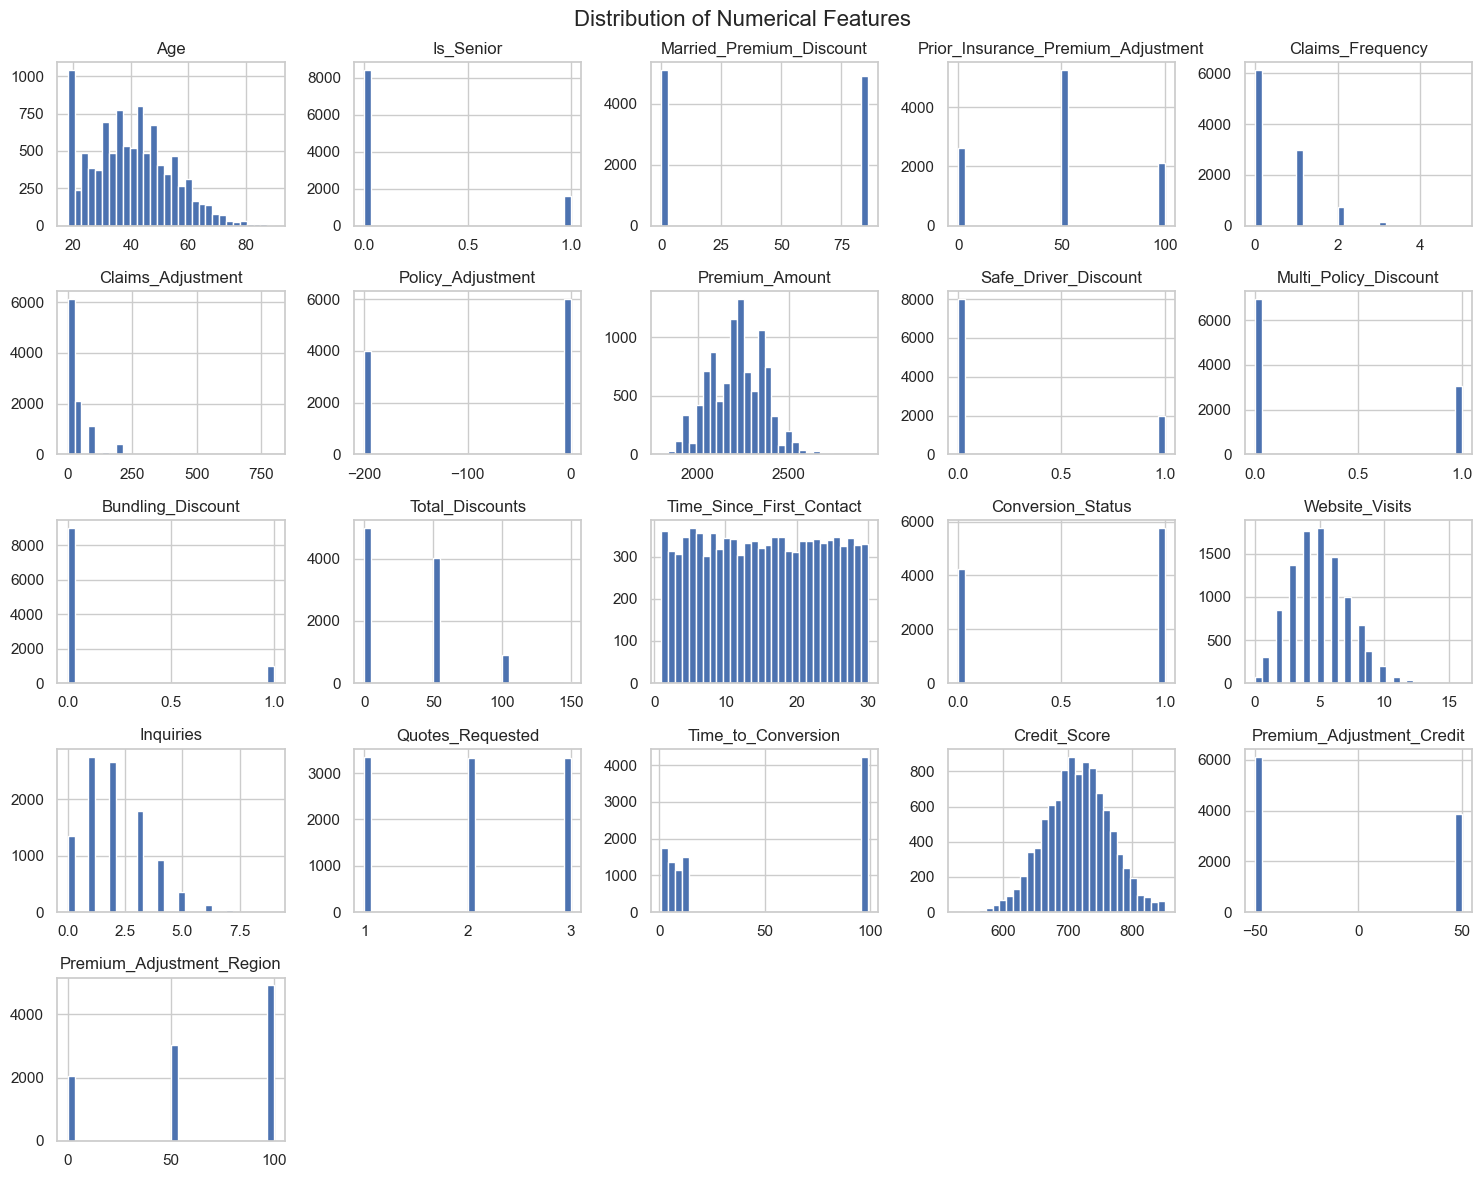

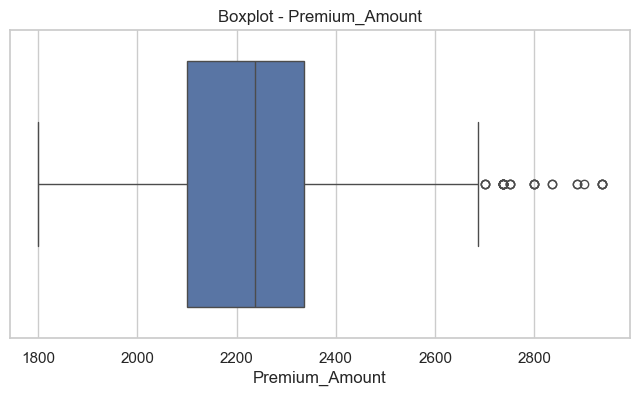

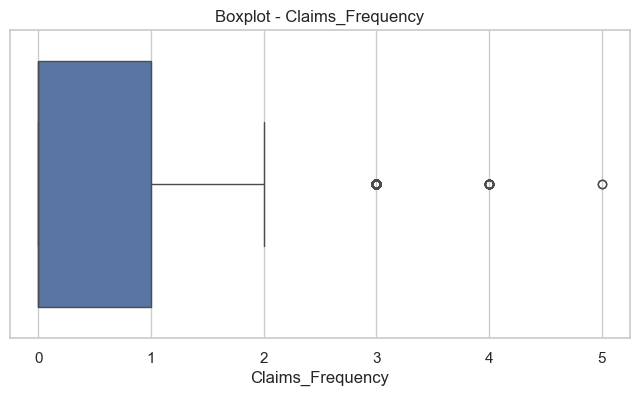

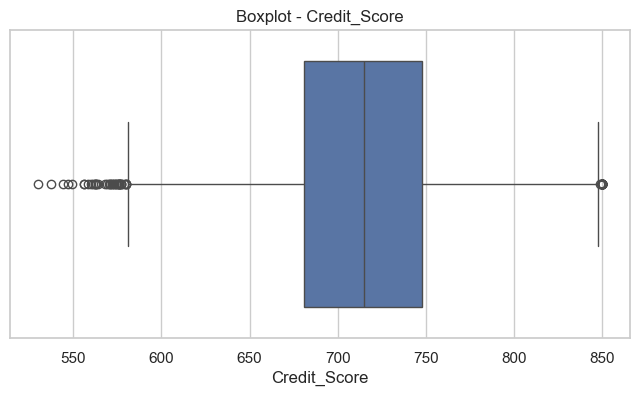

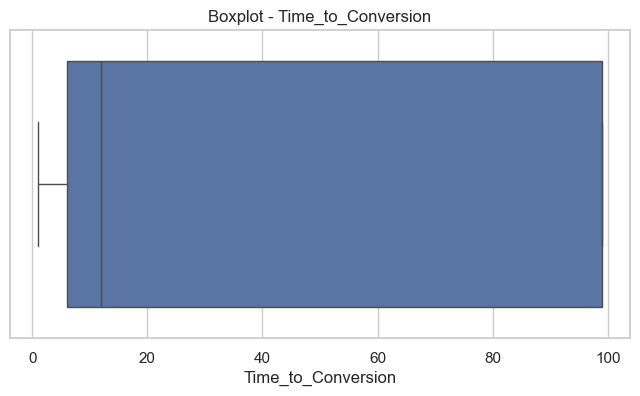

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for distribution
df[numerical_cols].hist(figsize=(15, 12), bins=30)
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

# Boxplots to detect outliers
for col in ['Premium_Amount', 'Claims_Frequency', 'Credit_Score', 'Time_to_Conversion']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot - {col}')
    plt.show()


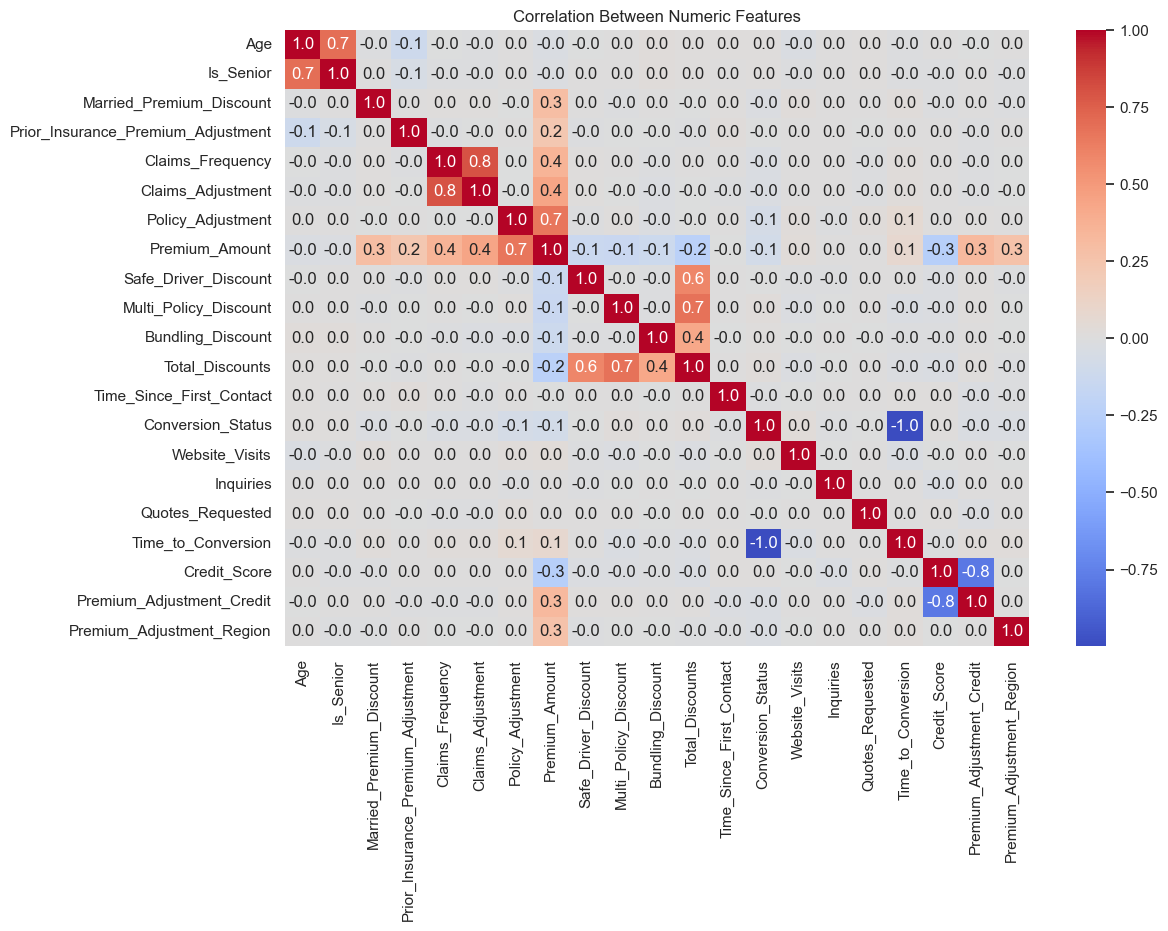

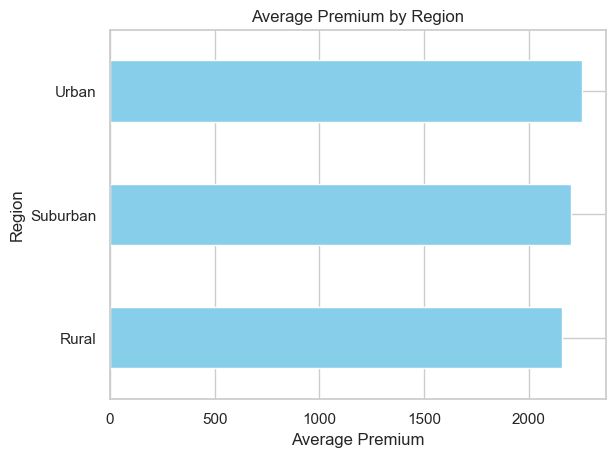

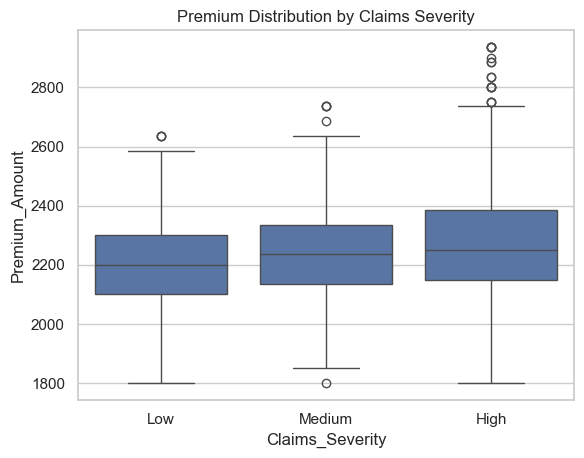

In [23]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".1f")
plt.title("Correlation Between Numeric Features")
plt.show()

# Grouped analysis: Avg Premium by Region
region_premium = df.groupby("Region")["Premium_Amount"].mean().sort_values()
region_premium.plot(kind="barh", title="Average Premium by Region", color='skyblue')
plt.xlabel("Average Premium")
plt.show()

# Claims Severity vs Premium
sns.boxplot(x="Claims_Severity", y="Premium_Amount", data=df)
plt.title("Premium Distribution by Claims Severity")
plt.show()


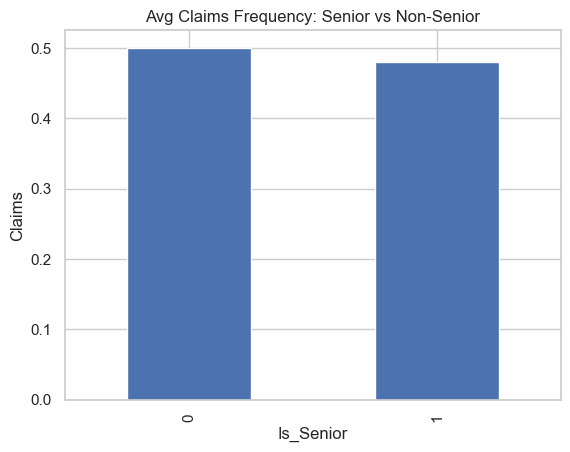

In [24]:
df.groupby("Is_Senior")["Claims_Frequency"].mean().plot(kind="bar")
plt.title("Avg Claims Frequency: Senior vs Non-Senior")
plt.ylabel("Claims")
plt.show()


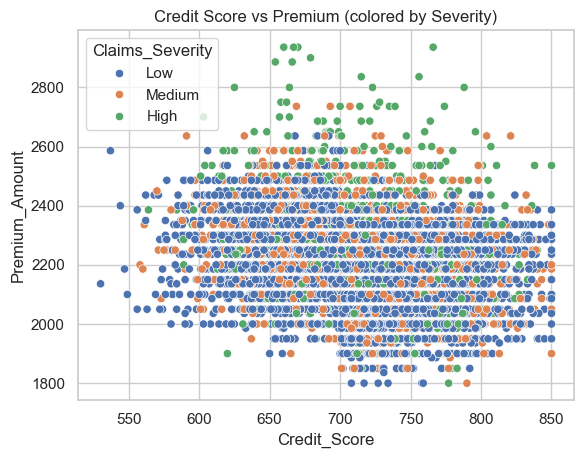

In [25]:
sns.scatterplot(x="Credit_Score", y="Premium_Amount", hue="Claims_Severity", data=df)
plt.title("Credit Score vs Premium (colored by Severity)")
plt.show()


In [52]:
import pandas as pd

# Load your dataset
df = pd.read_csv("synthetic_insurance_data.csv")

# Step 1: Map Claims Severity to numeric score
severity_map = {'Low': 1, 'Medium': 2, 'High': 3}
df['Severity_Score'] = df['Claims_Severity'].map(severity_map)

# Step 2: Calculate Risk-Adjusted Premium
df['Risk_Adjusted_Premium'] = df['Premium_Amount'] / (
    df['Claims_Frequency'].replace(0, 1) * df['Severity_Score'].replace(0, 1)
)

# Step 3: Define thresholds
claims_adj_threshold = df['Claims_Adjustment'].quantile(0.95)  # Top 5%
risk_premium_threshold = 1000  # You can adjust this based on data distribution

# Step 4: Create Anomaly Flag column
def flag_anomaly(row):
    if row['Claims_Frequency'] > 5:
        return 'High Risk'
    elif row['Claims_Adjustment'] >= claims_adj_threshold:
        return 'Extreme Risk'
    elif row['Risk_Adjusted_Premium'] < risk_premium_threshold:
        return 'Underpriced Risk'
    else:
        return 'Normal'

df['Anomaly_Flag'] = df.apply(flag_anomaly, axis=1)




In [53]:
df['Anomaly_Flag'].unique()

array(['Normal', 'Underpriced Risk', 'Extreme Risk'], dtype=object)

In [54]:
df['Risk_Adjusted_Premium'].describe()


count    10000.000000
mean      1752.202495
std        614.228314
min        241.666667
25%       1125.000000
50%       2086.000000
75%       2250.000000
max       2536.000000
Name: Risk_Adjusted_Premium, dtype: float64

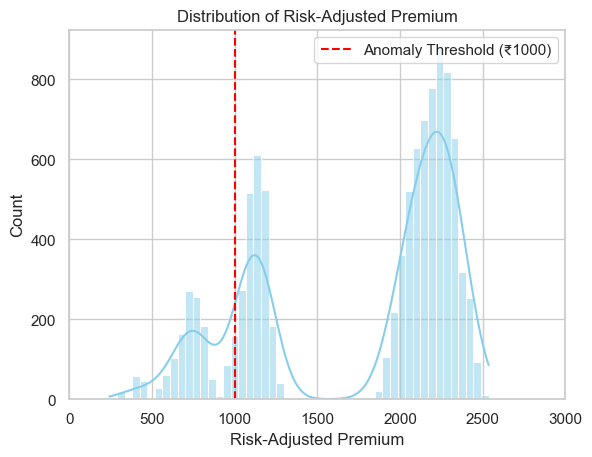

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Risk_Adjusted_Premium'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Risk-Adjusted Premium")
plt.xlabel("Risk-Adjusted Premium")
plt.ylabel("Count")
plt.axvline(x=1000, color='red', linestyle='--', label='Anomaly Threshold (₹1000)')
plt.legend()
plt.xlim(0, 3000)  # adjust this based on your data range
plt.show()


In [47]:
# Step 5: Save for Tableau
df.to_csv("insurance_dashboard_ready.csv", index=False)

print("Anomaly flags created and file saved as 'insurance_dashboard_ready.csv'")

Anomaly flags created and file saved as 'insurance_dashboard_ready.csv'
